In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
bs08 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_4.csv')
bs09 = pd.read_csv('DE1_0_2009_Beneficiary_Summary_File_Sample_4.csv')
bs10 = pd.read_csv('DE1_0_2010_Beneficiary_Summary_File_Sample_4.csv')
bs = pd.concat([bs08, bs09, bs10])

In [3]:
li = ['DESYNPUF_ID','BENE_SEX_IDENT_CD', 'BENE_BIRTH_DT', 'BENE_DEATH_DT','BENE_RACE_CD', 'SP_STATE_CODE', 
                        'BENE_COUNTY_CD','SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DIABETES', 'SP_DEPRESSN', 
                        'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'MEDREIMB_OP', 'BENRES_OP', 
                        'PPPYMT_OP']
bs1 = bs[li]
bs1 = bs1.dropna(axis=1, how='all')
bs1 = bs1.dropna(axis=0, how='all')
bs1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BENE_SEX_IDENT_CD,343506.0,1.557725e+00,0.496657,1.0,1.0,2.0,2.0,2.0
BENE_BIRTH_DT,343506.0,1.936387e+07,125155.780608,19090101.0,19281101.0,19360601.0,19420301.0,19831201.0
BENE_DEATH_DT,5385.0,2.009075e+07,8135.080051,20080101.0,20081001.0,20090701.0,20100401.0,20101201.0
BENE_RACE_CD,343506.0,1.280615e+00,0.748403,1.0,1.0,1.0,1.0,5.0
SP_STATE_CODE,343506.0,2.575140e+01,15.600282,1.0,11.0,25.0,39.0,54.0
BENE_COUNTY_CD,343506.0,3.656617e+02,266.584105,0.0,140.0,330.0,552.0,999.0
SP_ALZHDMTA,343506.0,1.802530e+00,0.398090,1.0,2.0,2.0,2.0,2.0
SP_CHF,343506.0,1.705245e+00,0.455933,1.0,1.0,2.0,2.0,2.0
SP_CHRNKIDN,343506.0,1.830664e+00,0.375049,1.0,2.0,2.0,2.0,2.0
SP_CNCR,343506.0,1.934636e+00,0.247168,1.0,2.0,2.0,2.0,2.0


In [4]:
bs1['Dead'] = bs1.BENE_DEATH_DT.apply(lambda x: 1 if pd.notnull(x) else 0)

In [5]:
incl = pd.read_csv('DE1_0_2008_to_2010_Inpatient_Claims_Sample_4.csv')
bs1 = pd.merge(bs1, incl[['DESYNPUF_ID','CLM_ADMSN_DT']], how='left', on='DESYNPUF_ID')
target_date = 20100101
bs1['Y'] = bs1['CLM_ADMSN_DT'].apply(lambda x: 1 if x >= target_date else 0)
bs1.head()

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,...,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,Dead,CLM_ADMSN_DT,Y
0,0000D684F621DFBD,2,19380901,NaN,1,28,270,2,2,2,...,2,2,2,2,140.0,30.0,0.0,0,NaN,0
1,0000FC926C37BC5F,1,19210901,NaN,3,39,10,2,2,2,...,2,2,2,2,0.0,0.0,0.0,0,NaN,0
2,00011C5F15219ACD,2,19280101,NaN,1,23,720,1,1,2,...,2,2,2,2,0.0,0.0,0.0,0,NaN,0
3,0001694E47AE68F9,1,19410201,NaN,2,25,520,2,2,2,...,2,2,2,2,1250.0,130.0,0.0,0,NaN,0
4,0001956E385E312B,1,19250601,NaN,1,34,170,2,2,2,...,1,2,2,2,1130.0,20.0,0.0,0,NaN,0


In [6]:
bs1 = pd.read_csv('bs1.csv',index_col=0)
bs1.head().transpose()

,0,1,2,3,4
DESYNPUF_ID,00000B48BCF4AD29,00000B48BCF4AD29,00000B48BCF4AD29,0000525AB30E4DEF,0000525AB30E4DEF
BENE_BIRTH_DT,19230901,19230901,19230901,19201001,19201001
BENE_DEATH_DT,NaN,NaN,NaN,NaN,NaN
BENE_SEX_IDENT_CD,2,2,2,2,2
BENE_RACE_CD,5,5,5,1,1
SP_STATE_CODE,10,10,10,31,31
BENE_COUNTY_CD,260,260,260,300,300
SP_ALZHDMTA,2,2,2,2,2
SP_CHF,1,1,1,2,2
SP_CHRNKIDN,2,2,2,2,2


In [7]:
bs1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BENE_BIRTH_DT,141363.0,1.936140e+07,128137.311096,19090101.0,19280301.0,19351201.0,19420201.0,19831201.0
BENE_DEATH_DT,2240.0,2.010065e+07,345.661369,20100101.0,20100301.0,20100601.0,20100901.0,20101201.0
BENE_SEX_IDENT_CD,141363.0,1.559354e+00,0.496466,1.0,1.0,2.0,2.0,2.0
BENE_RACE_CD,141363.0,1.277994e+00,0.743136,1.0,1.0,1.0,1.0,5.0
SP_STATE_CODE,141363.0,2.574233e+01,15.388934,1.0,11.0,25.0,39.0,54.0
BENE_COUNTY_CD,141363.0,3.688617e+02,266.599832,0.0,141.0,331.0,560.0,999.0
SP_ALZHDMTA,141363.0,1.791112e+00,0.406515,1.0,2.0,2.0,2.0,2.0
SP_CHF,141363.0,1.672906e+00,0.469154,1.0,1.0,2.0,2.0,2.0
SP_CHRNKIDN,141363.0,1.801051e+00,0.399211,1.0,2.0,2.0,2.0,2.0
SP_CNCR,141363.0,1.937615e+00,0.241855,1.0,2.0,2.0,2.0,2.0


In [8]:
bs1 = bs1.drop_duplicates(['DESYNPUF_ID'])

In [9]:
bs1 = bs1.drop(['DESYNPUF_ID','BENE_BIRTH_DT','CLM_ADMSN_DT', 'fst_admsn_dt', 'MEDREIMB_OP', 'BENRES_OP', 'PPPYMT_OP', 
                         'BENE_DEATH_DT', 'DEATH'], axis=1)

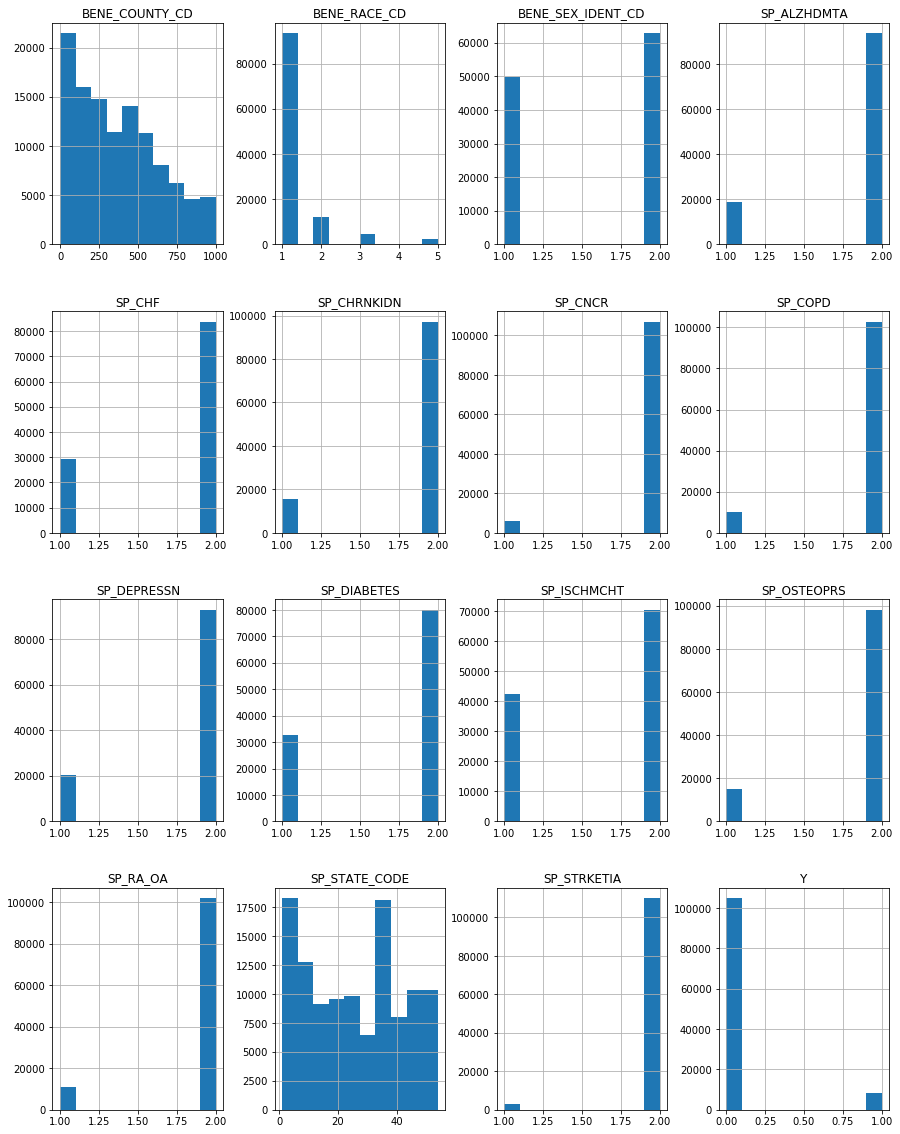

In [10]:
#Variable descriptions:
#Sex_Ident: 1 = Male, 2= Female Race: 1 = White, 2 = Black, 3 = Others, 4 = Hispanic Binary variables: 1 = Yes, 2 = No#Plot histograms of all features
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
bs1.hist(ax = ax)
plt.show()

In [11]:
#Making a decision tree and AUC to check feature importances
from sklearn.tree import DecisionTreeClassifier

#build a decision tree with max_depth = 20 using entropy
Y = bs1['Y']
X = bs1.drop('Y', 1)

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
dt.fit(X, Y)

#Now use built in feature importance attribute to get MI of each feature and Y
feature_mi = dt.feature_importances_
#Add features and their importances to a dictionary
feature_mi_dict = dict(zip(X.columns.values, feature_mi))



In [12]:
#define a function to print ROC curves. 
#It should take in only arrays/lists of predictions and outcomes
from sklearn.metrics import roc_curve, auc

def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

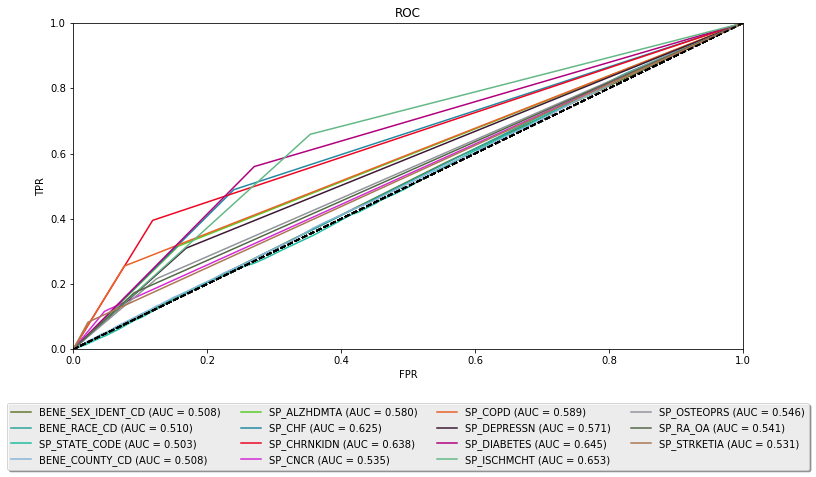

In [13]:

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#Plot the univariate AUC on the training data. Store the AUC

#Student put code here
feature_auc_dict = {}
for col in bs1.drop('Y',1).columns:
    feature_auc_dict[col] = plotUnivariateROC(bs1[col], Y, col)


# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [14]:
#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict), columns = ['auc'])
df_mi = pd.DataFrame(pd.Series(feature_mi_dict), columns = ['mi'])

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_mi, left_index = True, right_index = True)
feat_imp_df

,auc,mi
BENE_COUNTY_CD,0.507765,0.295775
BENE_RACE_CD,0.510280,0.043232
BENE_SEX_IDENT_CD,0.508142,0.043008
SP_ALZHDMTA,0.579598,0.035925
SP_CHF,0.624701,0.024018
SP_CHRNKIDN,0.638313,0.102249
SP_CNCR,0.534843,0.016246
SP_COPD,0.589436,0.031229
SP_DEPRESSN,0.570707,0.030401
SP_DIABETES,0.644926,0.041652


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
import course_utils as bd
from importlib import reload
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,auc
from sklearn import linear_model
reload(bd)
%matplotlib inline


train_df = bs1.sample(frac=0.8,replace=False)
test_df = bs1.drop(train_df.index)

#Dataframes
x = train_df.drop('Y',1)
y = train_df['Y']

#Numpy arrays for .fit function
X = x.as_matrix()   
Y = y.as_matrix()

#Simple SVM
my_svm = svm.SVC(kernel='linear',probability=True)
my_svm.fit(X,Y)  

#bd.plotSVM(x,y,my_svm)  

#Logistic Regression
logreg = linear_model.LogisticRegression(C=1e30)
logreg.fit(X,Y)

#Test data
w = test_df.drop('Y',1)
z = test_df['Y']
W = w.as_matrix()
Z = z.as_matrix()

#Predicted Values
l =  logreg.predict_proba(W)[:, 1]
s = my_svm.predict_proba(W)[:, 1]
#AUC Scores
#l_auc = roc_auc_score(Z,l)
#s_auc = roc_auc_score(Z,s)
#For SVM ROC
fpr, tpr, thresholds = roc_curve(z,s)
s_roc_auc = auc(fpr, tpr)
c = (np.random.rand(), np.random.rand(), np.random.rand())
plt.plot(fpr, tpr, color = c, label = 'SVM' + ' (AUC = %0.3f)' % s_roc_auc)
#For Logistic Regression ROC
fpr, tpr, thresholds = roc_curve(z,l)
s_roc_auc = auc(fpr, tpr)
c = (np.random.rand(), np.random.rand(), np.random.rand())
plt.plot(fpr, tpr, color = c, label = 'Logistic Regression' + ' (AUC = %0.3f)' % s_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")

In [15]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
# Statistical tests can be used to select those features that have the strongest 
# relationship with the output variable.The scikit-learn library provides the SelectKBest class 
# that can be used with a suite of different statistical tests to select a specific number of features.
# The example below uses the chi squared (chi^2) statistical test for non-negative features to select 8 of the best
#features

import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = bs1.drop('Y',1)
Y = bs1['Y']
# feature extraction
test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features)

[    1.29      6.037     7.398  1067.231   104.819   270.525   311.481
    18.886   126.86     83.199   372.527   434.497    34.227    26.875
    14.323]
[[260   2   1 ...,   2   1   1]
 [300   2   2 ...,   2   1   2]
 [ 70   2   1 ...,   2   1   2]
 ..., 
 [ 50   2   2 ...,   2   2   2]
 [290   2   2 ...,   2   2   2]
 [801   1   1 ...,   2   1   1]]


Y                    1.000000
BENE_SEX_IDENT_CD    0.008494
BENE_COUNTY_CD       0.006995
SP_STATE_CODE        0.002646
BENE_RACE_CD        -0.011004
SP_OSTEOPRS         -0.070542
SP_RA_OA            -0.071879
SP_CNCR             -0.081486
SP_DEPRESSN         -0.095626
SP_STRKETIA         -0.098594
SP_ALZHDMTA         -0.110317
SP_CHF              -0.147727
SP_COPD             -0.162696
SP_ISCHMCHT         -0.163241
SP_DIABETES         -0.165312
SP_CHRNKIDN         -0.207451
Name: Y, dtype: float64


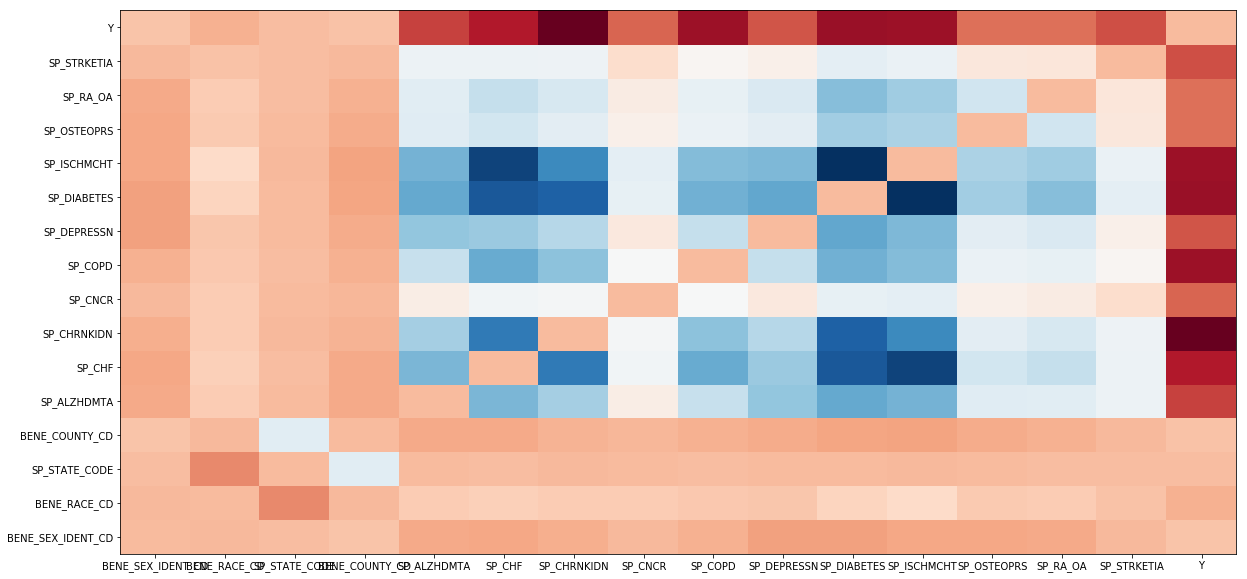

In [16]:
cr = bs1.corr()
print(cr['Y'].sort_values(ascending=False))
for n in range(cr.shape[0]):
     cr.iloc[n,n] = 0
fig, ax = plt.subplots(figsize = (20,10))
heatmap = ax.pcolor(cr, cmap=plt.cm.RdBu)
ax.set_xticks(np.arange(cr.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(cr.shape[1])+0.5, minor=False)
ax.set_xticklabels(cr.index.values, minor=False)
ax.set_yticklabels(cr.index.values, minor=False)
heatmap.set_label('Pearson Correlation')
plt.show()

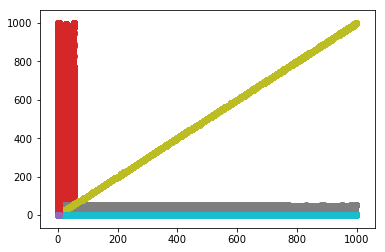

In [17]:
for x in bs1.drop('Y',1).columns:
    for y in bs1.drop('Y',1).columns:
        plt.scatter(bs1[x], bs1[y])